Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.
Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [30]:
df = pd.read_csv('googleplaystore.csv', sep=',')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [31]:
def convert_date(data):
    '''Принимает сторку с датой, возвращает год выхода приложения'''
    try:
        new_data = pd.to_datetime(data, format="%B %d, %Y").year
    except:
        new_data = np.nan
    return new_data

In [32]:
def convert_installs(data):
    '''Принимает сторку с количеством установок, возвращает количество установок в виде числа'''
    n = 0
    for i in data:
        if i == '0':
            n += 1
    try:
        new_data = int(data[0]) * 10 ** n
    except:
        new_data = np.nan
    return new_data

In [33]:
def convert_price(data):
    '''Принимает сторку с ценой, возвращает цену в виде числа'''
    price = 0
    if data == '0':
        price = 0
    else:    
        try: 
            price = float(data[1:])
        except:
            price = np.nan
    return price

In [34]:
# Преобразуем дату в год
df['Last Updated'] = df['Last Updated'].apply(convert_date)
# Преобразуем количесто установок в число
df['Installs'] = df['Installs'].apply(convert_installs)
# Преобразуем цену в число
df['Price'] = df['Price'].apply(convert_price)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,2018.0,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018.0,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018.0,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,2018.0,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018.0,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,2017.0,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,2018.0,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0.0,Everyone,Medical,2017.0,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,2015.0,Varies with device,Varies with device


In [35]:
# Вычисляем выручку за приложение
df['Profit'] = df['Installs'] * df['Price']
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,2018.0,1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018.0,2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018.0,1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,2018.0,Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018.0,1.1,4.4 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,2017.0,1.48,4.1 and up,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,2018.0,1.0,4.1 and up,0.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0.0,Everyone,Medical,2017.0,1.0,2.2 and up,0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,2015.0,Varies with device,Varies with device,0.0


In [36]:
# Распределение выручки по годам
profit_dynamics = df[['Profit'] + ['Last Updated']].groupby('Last Updated').sum()
profit_dynamics

,Profit
Last Updated,
2010.0,0.000000e+00
2011.0,6.989000e+03
2012.0,3.016740e+04
2013.0,1.846521e+06
2014.0,9.456555e+06
2015.0,1.236104e+07
2016.0,2.057007e+07
2017.0,4.291094e+07
2018.0,3.014472e+08


Text(0, 0.5, 'Выручка')

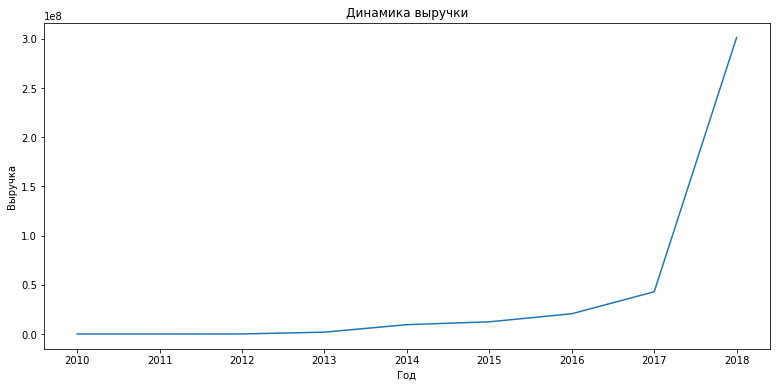

In [37]:
# График динамики изменения выручки
profit_dynamics['Profit'].plot()
plt.title('Динамика выручки') 
plt.xlabel('Год')
plt.ylabel('Выручка')

Text(0.5, 1.0, 'Рейтинг')

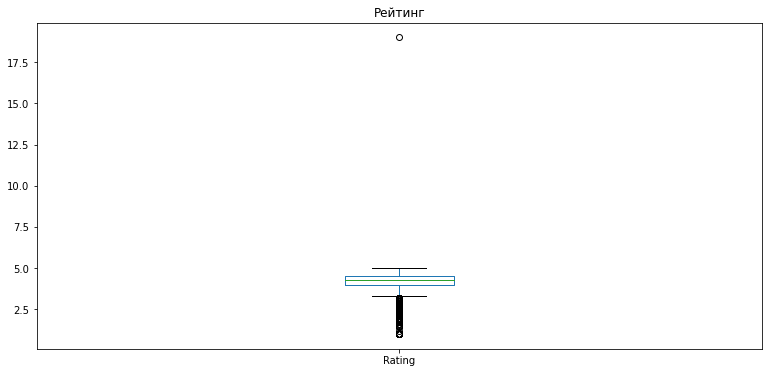

In [38]:
# Cтатика оценок приложений
df['Rating'].plot(kind='box')
plt.title('Рейтинг') 

Здесь мы видим выброс, его не нужно учитывать.

In [39]:
# Удаляем выброс
df.loc[df['Rating'] > 5,'Rating'] = np.nan

Text(0.5, 1.0, 'Рейтинг')

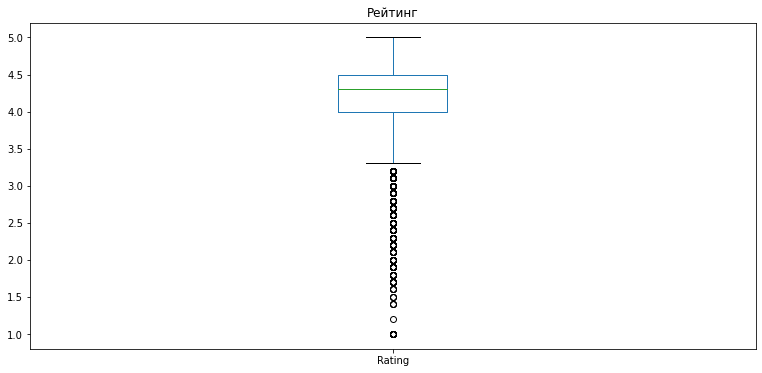

In [40]:
# Новый график 
df['Rating'].plot(kind='box')
plt.title('Рейтинг') 

In [41]:
# Средний рейтинг по годам
rating_dynamics = df[['Rating'] + ['Last Updated']].groupby('Last Updated').mean()
rating_dynamics

,Rating
Last Updated,
2010.0,4.200000
2011.0,3.966667
2012.0,3.785714
2013.0,4.073404
2014.0,4.037895
2015.0,4.067268
2016.0,4.041782
2017.0,4.094793
2018.0,4.244530


Text(0, 0.5, 'Средний рейтинг')

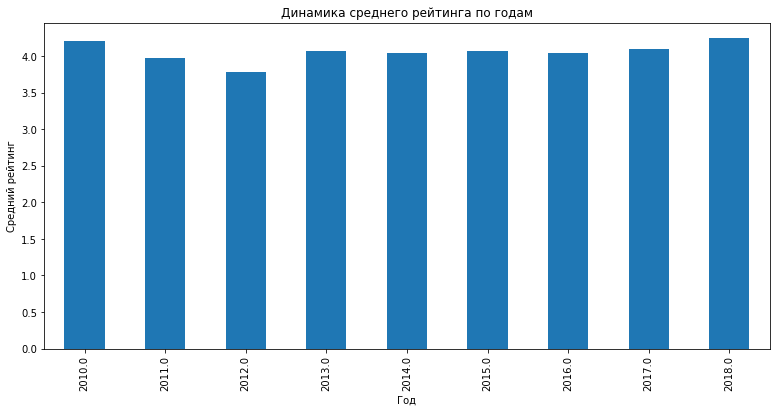

In [42]:
# Распределение среднего рейтинга по годам
rating_dynamics['Rating'].plot(kind='bar')
plt.title('Динамика среднего рейтинга по годам') 
plt.xlabel('Год')
plt.ylabel('Средний рейтинг')

Text(0.5, 1.0, 'Взаимосвязь рейтинга и количества установок')

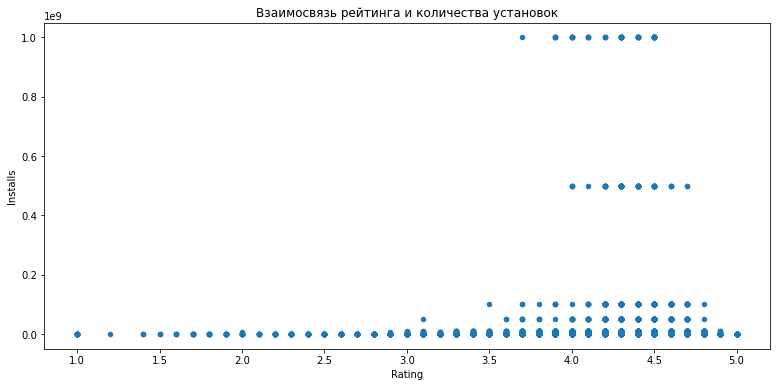

In [43]:
# Взаимосвязь рейтинга и количества установок
df.plot(kind='scatter', 
        x='Rating', 
        y='Installs')
plt.title('Взаимосвязь рейтинга и количества установок')

In [44]:
import seaborn as sns

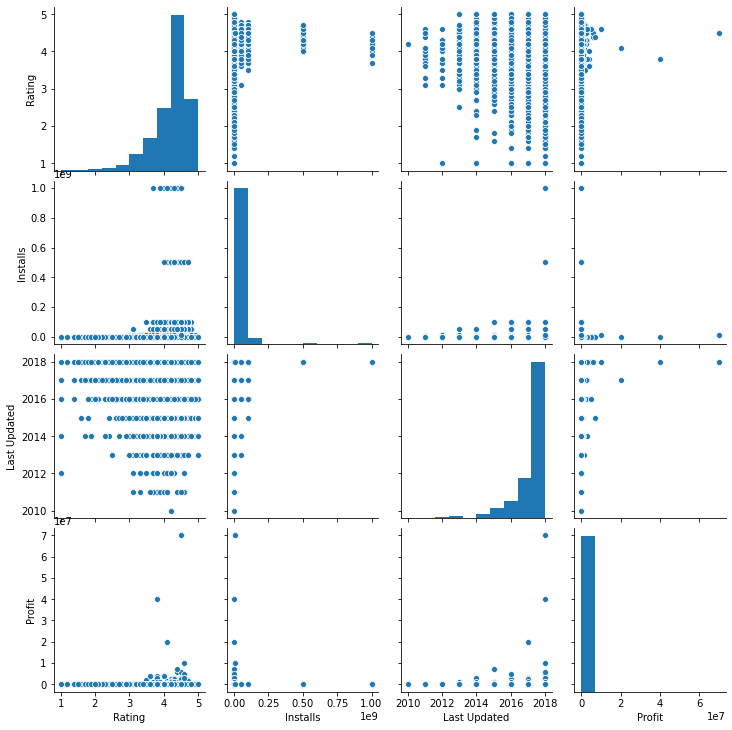

In [45]:
# Взаимосвязи данных в столбцах
sns.pairplot(df[['Rating', 'Installs', 'Last Updated', 'Profit']])

In [46]:
# Топ 10 категорий приложений
top_category = df['Category'].value_counts().sort_values(ascending = False).head(10).index.values
top_category

array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE'],
      dtype=object)

In [47]:
# Выручка по годам для топ 10 приложений
category_year_profit = df[df.Category.isin(top_category)].pivot_table(
                        index='Category', 
                        columns='Last Updated',
                        values='Profit',
                        aggfunc='sum').fillna(0)

category_year_profit

Last Updated,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Category,,,,,,,,,
BUSINESS,0.0,0.0,0.0,0.00,24.90,0.00,31890.00,1018178.85,9.984495e+05
COMMUNICATION,0.0,0.0,0.0,0.00,406450.00,17588.00,79800.00,27954.90,3.715572e+06
FAMILY,0.0,0.0,267.4,184602.40,3138296.39,2125047.45,4378621.55,11104030.78,1.651218e+08
GAME,0.0,0.0,0.0,298.50,3121880.00,9191527.00,8177599.99,1860957.47,1.863537e+07
LIFESTYLE,0.0,0.0,0.0,0.00,99.00,0.00,9980.40,42940.00,5.753092e+07
MEDICAL,0.0,0.0,29900.0,354850.00,1333868.50,117805.00,218278.00,1157515.90,1.036263e+07
PERSONALIZATION,0.0,0.0,0.0,1276587.00,119890.00,68037.50,7478828.95,292703.78,1.040900e+06
PRODUCTIVITY,0.0,0.0,0.0,1294.95,996287.90,2990.00,9084.00,17599.40,3.286119e+06
SPORTS,0.0,0.0,0.0,388.00,1990.00,4038.00,15249.00,253177.00,4.431370e+06


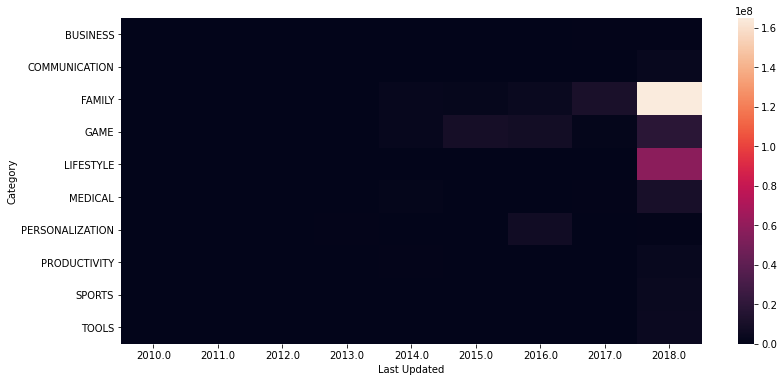

In [48]:
#Выручка по годам для топ 10 приложений
sns.heatmap(category_year_profit)

График не очень информативный, сделаем еще один.

In [49]:
# Среднее значение рейтинга по аудитории для топ 10 приложений
category_rating = df[df.Category.isin(top_category)].pivot_table(
                        index='Category', 
                        columns='Content Rating',
                        values='Rating',
                        aggfunc='mean').fillna(0)

category_rating

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
BUSINESS,0.0,4.119064,0.000000,0.000000,4.300000,0.0
COMMUNICATION,0.0,4.140678,0.000000,4.311111,4.320833,0.0
FAMILY,0.0,4.194157,4.238889,4.193182,4.157438,0.0
GAME,0.0,4.283480,4.346923,4.262162,4.272531,0.0
LIFESTYLE,0.0,4.073759,3.840000,4.255556,4.416667,0.0
MEDICAL,0.0,4.176276,4.387500,4.466667,4.533333,0.0
PERSONALIZATION,0.0,4.323443,4.380000,4.500000,4.403571,0.0
PRODUCTIVITY,0.0,4.212968,3.600000,4.600000,4.050000,0.0
SPORTS,4.5,4.217091,4.333333,4.285714,4.140000,0.0


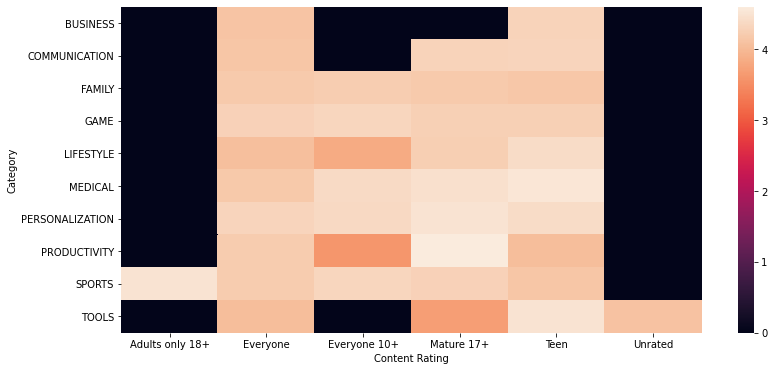

In [50]:
# Среднее значение рейтинга по аудитории для топ 10 приложений
sns.heatmap(category_rating)

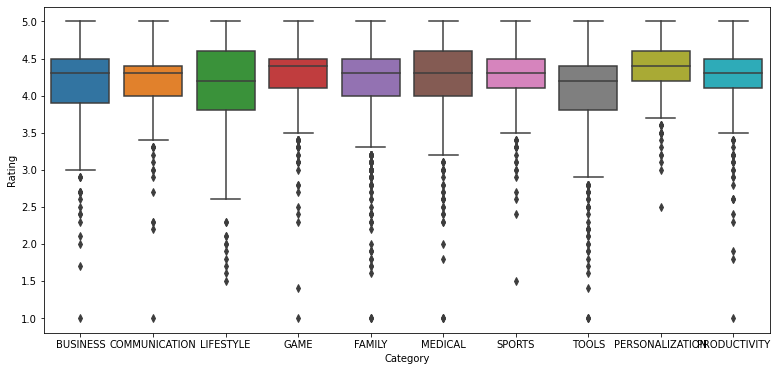

In [51]:
# Сравнение рейтинга для топ 10 приложений
sns.boxplot(x="Category", y="Rating", 
            data=df[df.Category.isin(top_category)])

Text(0.5, 1.0, 'Распределение рейтинга приложений')

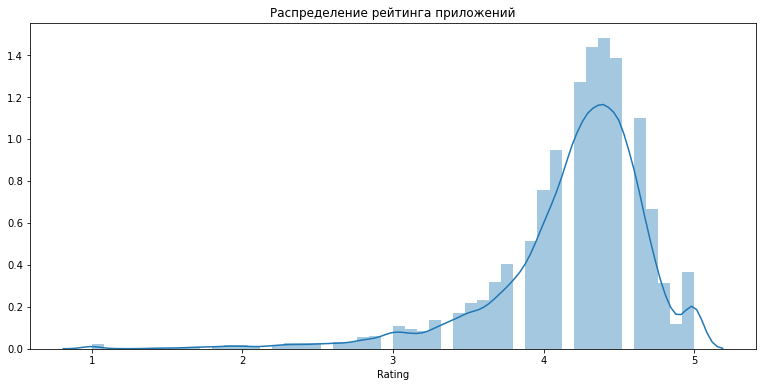

In [52]:
# Плотность распределения рейтинга приложений
r = sns.distplot(df.Rating)
r.set_title('Распределение рейтинга приложений')